# s01: Plotting


This is a quick introduction to Matplotlib.


From [Claus O. Wilke: "Fundamentals of Data Visualization"](https://clauswilke.com/dataviz/):

> *One thing I have learned over the years is that automation is your friend. I
> think figures should be autogenerated as part of the data analysis pipeline
> (which should also be automated), and they should come out of the pipeline
> ready to be sent to the printer, no manual post-processing needed.*

## Objectives of this session:
- Be able to create simple plots with Matplotlib and tweak them
- Know about object-oriented vs pyplot interfaces of Matplotlib
- Be able to adapt gallery examples
- Know how to look for help
- Know that other tools exist

## Repeatability/reproducibility
- **No manual post-processing**. This will bite you when you need to regenerate 50
  figures one day before submission deadline or regenerate a set of figures
  after the person who created them left the group.
- Within Python, many libraries exist:
  - [Matplotlib](https://matplotlib.org/gallery/index.html):
    probably the most standard and most widely used
  - [Seaborn](https://seaborn.pydata.org/examples/index.html):
    high-level interface to Matplotlib, statistical functions built in
  - [Altair](https://altair-viz.github.io/gallery/index.html):
    declarative visualization (R users will be more at home), statistics built in
  - [Plotly](https://plotly.com/python/):
    interactive graphs
  - [Bokeh](https://demo.bokeh.org/):
    also here good for interactivity
  - [ggplot](https://yhat.github.io/ggpy/):
    R users will be more at home



## Why are we starting with Matplotlib?

- Matplotlib is perhaps the most "standard" Python plotting library.
- Many libraries build on top of Matplotlib.
- Even if you choose to use another library (see above list), chances are high
  that you need to adapt a Matplotlib plot of somebody else.

## Getting started with Matplotlib

Let us create our first plot using `matplotlib.pyplot.subplots`, `matplotlib.axes.Axes.scatter`, and some other methods on the `matplotlib.axes.Axes` object:

Text(0.5, 1.0, 'some title')

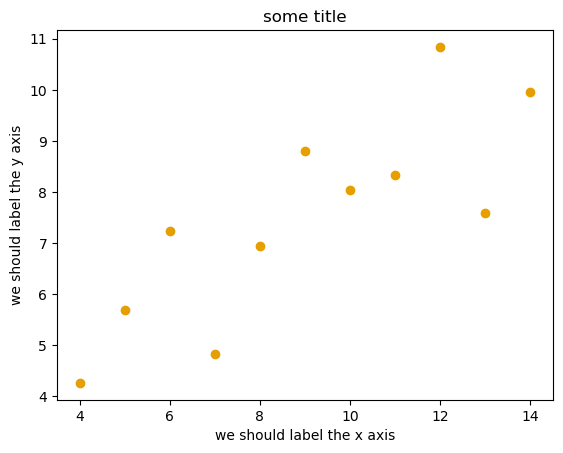

In [1]:
# this line tells Jupyter to display matplotlib figures in the notebook
%matplotlib inline

import matplotlib.pyplot as plt

# this is dataset 1 from
# https://en.wikipedia.org/wiki/Anscombe%27s_quartet
data_x = [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
data_y = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

fig, ax = plt.subplots()

ax.scatter(x=data_x, y=data_y, c="#E69F00")

ax.set_xlabel("we should label the x axis")
ax.set_ylabel("we should label the y axis")
ax.set_title("some title")


## Matplotlib has two different interfaces

The more traditional option uses the pyplot interface (`plt.<matplotlib.pyplot>` carries the global settings):

Text(0.5, 1.0, 'some title')

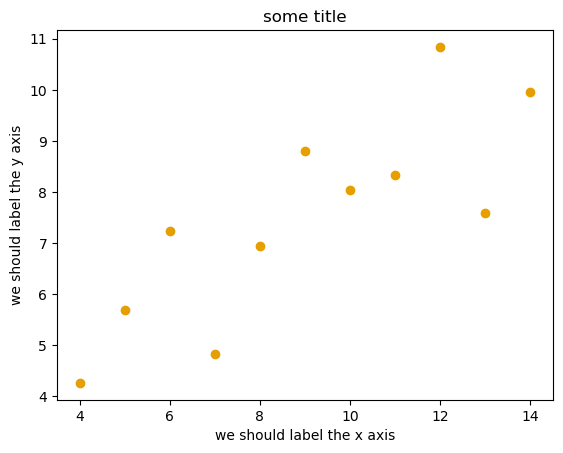

In [2]:
import matplotlib.pyplot as plt

# this is dataset 1 from
# https://en.wikipedia.org/wiki/Anscombe%27s_quartet
data_x = [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
data_y = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

plt.scatter(x=data_x, y=data_y, c="#E69F00")

plt.xlabel("we should label the x axis")
plt.ylabel("we should label the y axis")
plt.title("some title")

When searching for help on the internet, you will find both approaches, they can also be mixed. Although the pyplot interface looks more compact, **recommend to learn and use is the object oriented interface**.

## Styling and customizing plots

- **Do not customize "manually"** using a graphical program (not easily repeatable/reproducible).
- **No manual post-processing**. This will bite you when you need to regenerate 50
  figures one day before submission deadline or regenerate a set of figures
  after the person who created them left the group.
- Matplotlib and also all the other libraries allow to customize almost every aspect of a plot.
- It is useful to study [Matplotlib parts of a figure](https://matplotlib.org/faq/usage_faq.html#parts-of-a-figure)
  so that we know what to search for to customize things.
- Matplotlib cheatsheets: <https://github.com/matplotlib/cheatsheets>
- You can also select among pre-defined themes/
  [style
  sheets](https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html)
  with`matplotlib.style.use`, for instance:

In [3]:
plt.style.use('ggplot')

In [4]:
import numpy as np 

# We observe a bunch of squirrels with [height (cm), weight (grams)] pairs
data = np.array([[10., 600.], [16., 1200], [6., 800], [12., 700.], [17., 1400.],
                [8., 500.], [20., 1500.], [21., 1300.], [11., 800.], [18., 1100.]])

[Text(0.5, 0, 'Height (cm)'),
 Text(0, 0.5, 'Weight (g)'),
 (0.0, 25.0),
 (300.0, 1700.0)]

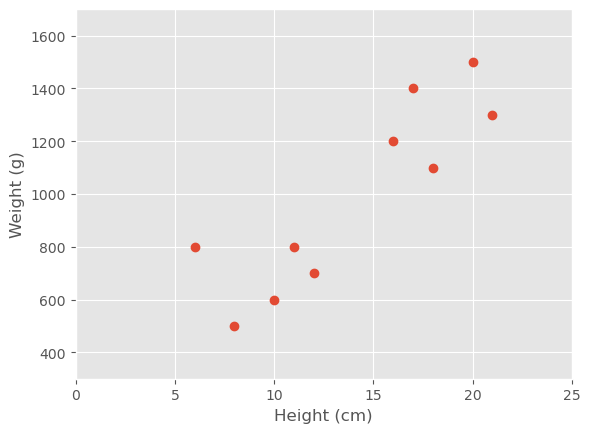

In [5]:
# Visualize our data!
fig, ax = plt.subplots()
ax.plot(data[:, 0], data[:, 1], '.', ms=12)
ax.set(xlabel='Height (cm)', ylabel='Weight (g)',
    xlim=[0, 25], ylim=[300, 1700])

[Text(0.5, 0, 'Height (cm)'),
 Text(0, 0.5, 'Weight (g)'),
 (0.0, 25.0),
 (300.0, 1700.0)]

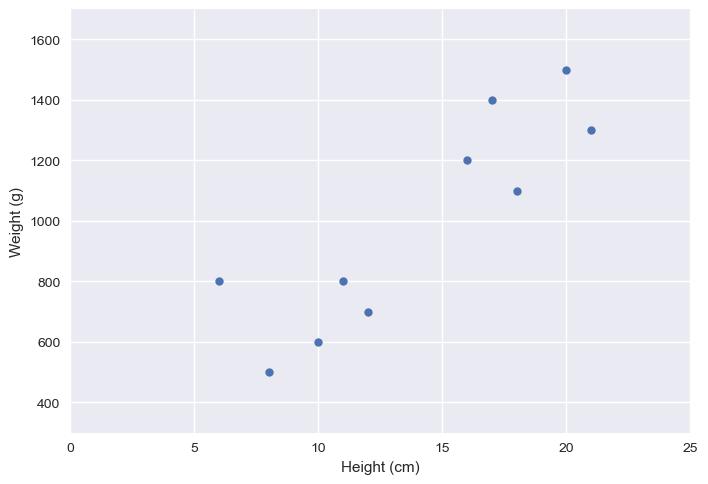

In [6]:
plt.style.use('seaborn')

# Visualize our data!
fig, ax = plt.subplots()
ax.plot(data[:, 0], data[:, 1], '.', ms=12)
ax.set(xlabel='Height (cm)', ylabel='Weight (g)',
    xlim=[0, 25], ylim=[300, 1700])


<div class="alert alert-info"> 
For all the different presets of styles in Matplotlib see: 
<a href=https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html class="alert-link">the gallery.</a>
</div>